# Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr, f_oneway
import scipy.stats as stats


# Wczytanie danych oraz połączenie w jeden plik

In [2]:
data1 = pd.read_csv('personal_health_data.csv')
data2 = pd.read_csv('digital_interaction_data.csv')
data3 = pd.read_csv('activity_environment_data.csv')

In [3]:
merge_dt = pd.merge(data1, data2, on='User_ID', how='left')

In [4]:
final_dt = pd.merge(merge_dt, data3, on='User_ID', how='left')

In [5]:
final_dt.to_csv('final_database.csv', index=False)

## Podstawowe EDA w celu lepszego zrozumienia danych

In [7]:
final_dt.head()

,User_ID,Age,Gender,Weight,Height,Medical_Conditions,Medication,Smoker,Alcohol_Consumption,Timestamp_x,...,Steps,Calories_Burned,Distance_Covered,Exercise_Type,Exercise_Duration,Exercise_Intensity,Ambient_Temperature,Battery_Level,Altitude,UV_Exposure
0,U_00001,61,Other,88.677623,178.524231,Diabetes,No,No,Moderate,2021-01-01 00:00:00,...,9146,457.30,7.3168,Running,1.219675,Low,27.271525,97.338777,1739.690662,4.069132
1,U_00002,24,Male,86.742084,200.346358,NaN,Yes,No,Moderate,2021-01-01 01:00:00,...,9362,468.10,7.4896,Yoga,1.378399,Moderate,24.430288,66.573240,4102.042824,1.723672
2,U_00003,81,Other,61.656054,195.971356,Hypertension,Yes,No,Moderate,2021-01-01 02:00:00,...,21,1.05,0.0168,Strength Training,0.803857,Moderate,29.340574,30.138828,1794.899935,0.135647
3,U_00004,70,Other,141.513794,164.178216,Hypertension,No,No,Heavy,2021-01-01 03:00:00,...,13252,662.60,10.6016,NaN,0.000000,NaN,25.289230,78.838640,4025.840921,4.408343
4,U_00005,30,Other,80.552872,146.920675,Diabetes,Yes,Yes,Heavy,2021-01-01 04:00:00,...,21,1.05,0.0168,Yoga,0.807389,High,21.853590,17.673261,3422.381447,2.820739


In [8]:
final_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 10000 non-null  object 
 1   Age                     10000 non-null  int64  
 2   Gender                  10000 non-null  object 
 3   Weight                  10000 non-null  float64
 4   Height                  10000 non-null  float64
 5   Medical_Conditions      6696 non-null   object 
 6   Medication              10000 non-null  object 
 7   Smoker                  10000 non-null  object 
 8   Alcohol_Consumption     6640 non-null   object 
 9   Timestamp_x             10000 non-null  object 
 10  Day_of_Week             10000 non-null  object 
 11  Sleep_Duration          10000 non-null  float64
 12  Deep_Sleep_Duration     10000 non-null  float64
 13  REM_Sleep_Duration      10000 non-null  float64
 14  Wakeups                 10000 non-null 

In [9]:
final_dt.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Weight                       0
Height                       0
Medical_Conditions        3304
Medication                   0
Smoker                       0
Alcohol_Consumption       3360
Timestamp_x                  0
Day_of_Week                  0
Sleep_Duration               0
Deep_Sleep_Duration          0
REM_Sleep_Duration           0
Wakeups                      0
Snoring                      0
Heart_Rate                   0
Blood_Oxygen_Level           0
ECG                          0
Calories_Intake              0
Water_Intake                 0
Stress_Level                 0
Mood                         0
Skin_Temperature             0
Body_Fat_Percentage          0
Muscle_Mass                  0
Health_Score                 0
Anomaly_Flag                 0
Timestamp_y                  0
Notifications_Received       0
Screen_Time                  0
Timestamp                    0
Steps   

In [10]:
final_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,47.534500,21.892659,10.000000,28.000000,47.000000,67.000000,85.000000
Weight,10000.0,90.371237,34.924593,30.001125,60.135075,89.856120,120.648181,150.978482
Height,10000.0,170.539415,17.599783,140.001252,155.422556,170.729185,185.740690,200.998406
Sleep_Duration,10000.0,7.014794,1.736720,4.000285,5.523986,6.992782,8.542130,9.999370
Deep_Sleep_Duration,10000.0,3.734520,2.131272,0.500598,1.984690,3.482726,5.143953,9.930642
REM_Sleep_Duration,10000.0,3.280274,2.153436,0.000805,1.505915,3.055617,4.726954,9.448512
Wakeups,10000.0,2.023800,1.412173,0.000000,1.000000,2.000000,3.000000,4.000000
Heart_Rate,10000.0,115.521500,37.805117,50.000000,83.000000,116.000000,148.000000,180.000000
Blood_Oxygen_Level,10000.0,95.482916,3.173641,90.002518,92.720766,95.484916,98.201036,100.999086
Calories_Intake,10000.0,2106.318237,518.697215,1200.011830,1656.599934,2105.455087,2552.938682,2999.733804


In [11]:
final_dt["Alcohol_Consumption"].value_counts()

Alcohol_Consumption
Moderate    3355
Heavy       3285
Name: count, dtype: int64

In [15]:
final_dt["Medical_Conditions"].value_counts()

Medical_Conditions
Diabetes        3359
Hypertension    3337
Name: count, dtype: int64

In [17]:
final_dt["Exercise_Intensity"].value_counts()

Exercise_Intensity
Moderate    2490
Low         2477
High        2432
Name: count, dtype: int64

## Sprawdzenie korelacji zmiennych numerycznych

In [12]:
only_numbers = final_dt.select_dtypes(include=['float64', 'int64'])

corr_matrix = only_numbers.corr()

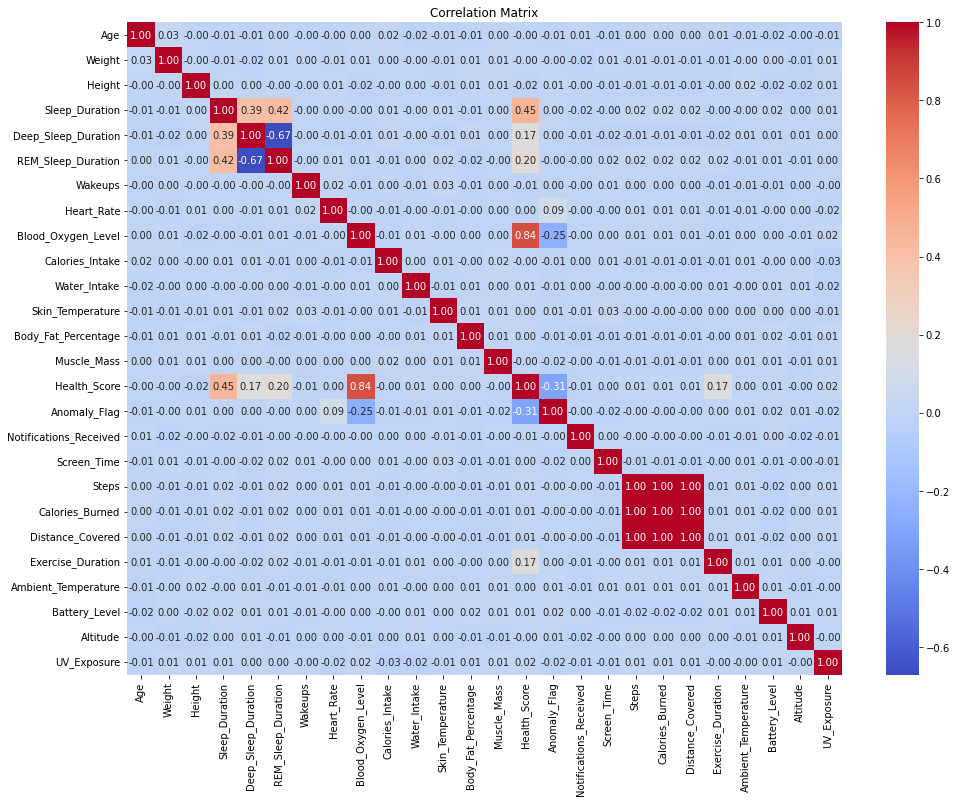

In [14]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Analiza wpływu jednej zmiennej na drugą (te najlepiej skorelowane)

In [26]:
print(final_dt[['Health_Score', 'Blood_Oxygen_Level']].isnull().sum())

Health_Score          0
Blood_Oxygen_Level    0
dtype: int64


In [27]:
X = final_dt['Health_Score']
y = final_dt['Blood_Oxygen_Level']

# Dodanie stałej (intercept) do modelu
X = sm.add_constant(X)

# Model regresji liniowej
model = sm.OLS(y, X).fit()

# Wyświetlenie wyników regresji
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Blood_Oxygen_Level   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                 2.374e+04
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:19:01   Log-Likelihood:                -19657.
No. Observations:               10000   AIC:                         3.932e+04
Df Residuals:                    9998   BIC:                         3.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.0580      0.051   1719.990   

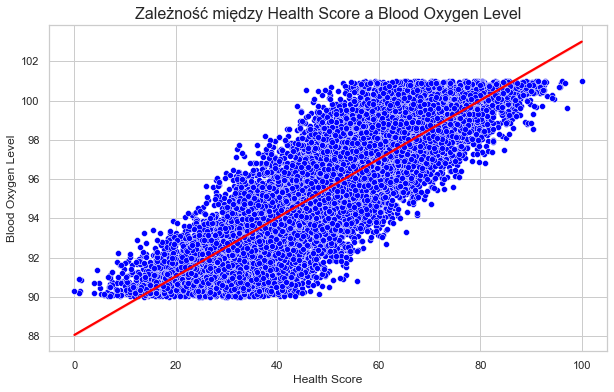

In [33]:
# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Scatter plot: health_score vs blood_oxygen_level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Health_Score', y='Blood_Oxygen_Level', data=final_dt, color='blue')

# Dodanie linii regresji
sns.regplot(x='Health_Score', y='Blood_Oxygen_Level', data=final_dt, scatter=False, color='red', line_kws={"color": "red"})

# Tytuł i etykiety osi
plt.title('Zależność między Health Score a Blood Oxygen Level', fontsize=16)
plt.xlabel('Health Score', fontsize=12)
plt.ylabel('Blood Oxygen Level', fontsize=12)

# Wyświetlenie wykresu
plt.show()

## Podsumowanie:
Wyniki regresji wskazują, że Health_Score ma istotny i pozytywny wpływ na Blood_Oxygen_Level. Model wyjaśnia 70.4% zmienności w poziomie tlenu we krwi na podstawie wyniku zdrowia, co jest bardzo dobrym wynikiem. Wartość współczynnika 0.1494 sugeruje, że wyższy Health_Score prowadzi do wyższego poziomu tlenu we krwi. Model jest istotny statystycznie (p-value = 0.000), co potwierdza, że zmienna Health_Score ma rzeczywisty wpływ na Blood_Oxygen_Level.

---------------

## Wizualizacja między parami zmiennych w celu sprawdzenia podstawowych zależności

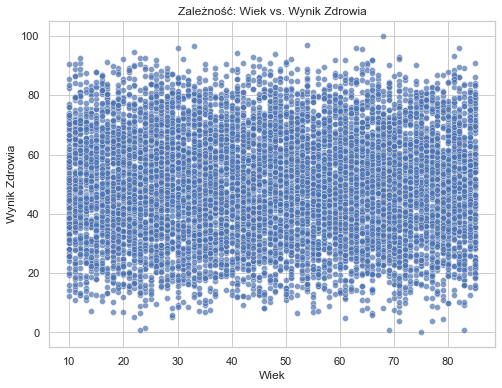

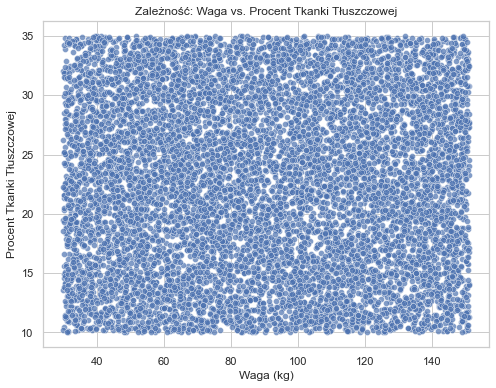

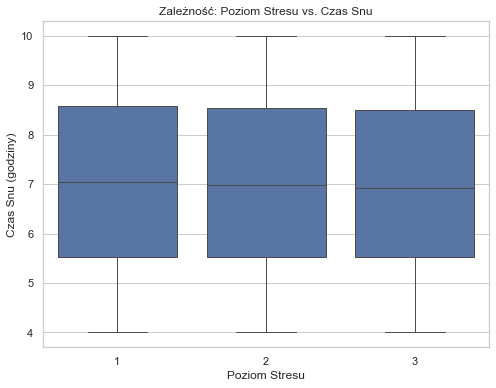

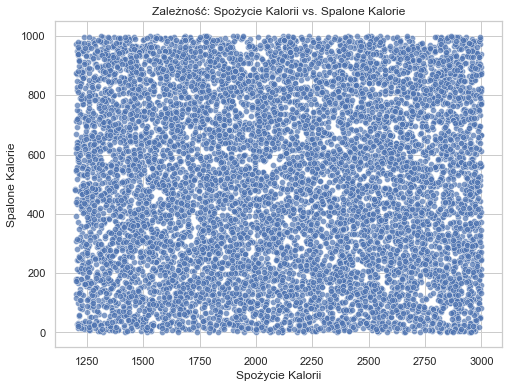

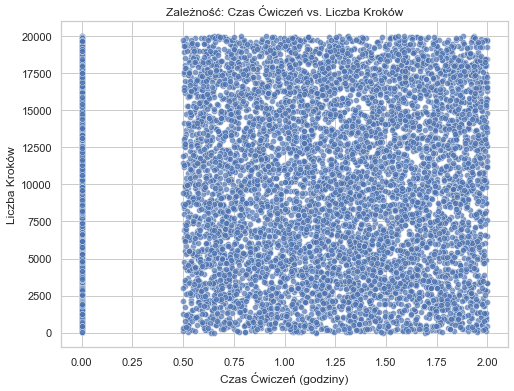

In [35]:
# 1. Age vs. Health_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_dt, x='Age', y='Health_Score', alpha=0.7)
plt.title('Zależność: Wiek vs. Wynik Zdrowia')
plt.xlabel('Wiek')
plt.ylabel('Wynik Zdrowia')
plt.show()

# 2. Weight vs. Body_Fat_Percentage
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_dt, x='Weight', y='Body_Fat_Percentage', alpha=0.7)
plt.title('Zależność: Waga vs. Procent Tkanki Tłuszczowej')
plt.xlabel('Waga (kg)')
plt.ylabel('Procent Tkanki Tłuszczowej')
plt.show()

# 3. Sleep_Duration vs. Stress_Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_dt, x='Stress_Level', y='Sleep_Duration')
plt.title('Zależność: Poziom Stresu vs. Czas Snu')
plt.xlabel('Poziom Stresu')
plt.ylabel('Czas Snu (godziny)')
plt.show()

# 4. Calories_Intake vs. Calories_Burned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_dt, x='Calories_Intake', y='Calories_Burned', alpha=0.7)
plt.title('Zależność: Spożycie Kalorii vs. Spalone Kalorie')
plt.xlabel('Spożycie Kalorii')
plt.ylabel('Spalone Kalorie')
plt.show()

# 5. Exercise_Duration vs. Steps
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_dt, x='Exercise_Duration', y='Steps', alpha=0.7)
plt.title('Zależność: Czas Ćwiczeń vs. Liczba Kroków')
plt.xlabel('Czas Ćwiczeń (godziny)')
plt.ylabel('Liczba Kroków')
plt.show()

### Badanie zależności pomiędzy Exercise_Duration na Steps oraz Stress_Level na Sleep_Duration

In [8]:
final_dt["Stress_Level"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

* zmiana zmiennej kategorycznej na numeryczną dla porównania średnich (ANOVA)

In [9]:
final_dt['Stress_Level'] = final_dt['Stress_Level'].map({'Low': 1, 'Moderate': 2, 'High': 3})

Analiza 1: Wpływ Exercise_Duration na Steps
-------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  Steps   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4038
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.525
Time:                        18:51:43   Log-Likelihood:            -1.0088e+05
No. Observations:               10000   AIC:                         2.018e+05
Df Residuals:                    9998   BIC:                         2.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

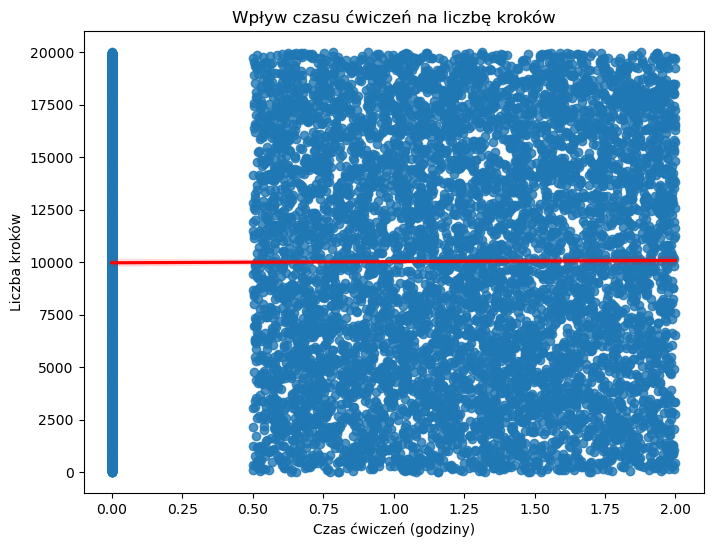

Analiza 2: Wpływ Stress_Level na Sleep_Duration
-------------------------------------------------
F-statistic: 0.54, P-value: 5.82e-01


c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Krzysztof\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


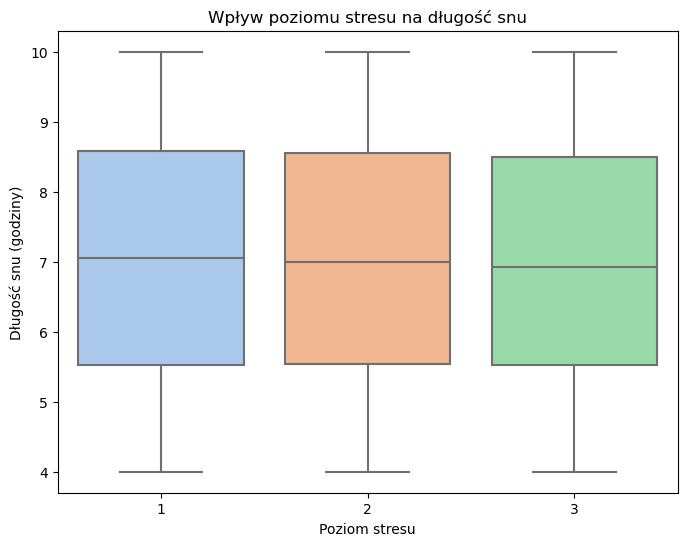

In [10]:
# Analiza 1: Wpływ Exercise_Duration na Steps
# Regresja liniowa
X = final_dt['Exercise_Duration']
y = final_dt['Steps']

# Dodanie stałej do modelu regresji
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()

# Współczynnik korelacji
corr, p_value_corr = pearsonr(final_dt['Exercise_Duration'], final_dt['Steps'])

# Wyniki analizy
print("Analiza 1: Wpływ Exercise_Duration na Steps")
print("-------------------------------------------------")
print(model.summary())
print(f"\nWspółczynnik korelacji: {corr:.2f}, P-value: {p_value_corr:.2e}\n")

# Wizualizacja regresji liniowej
plt.figure(figsize=(8, 6))
sns.regplot(data=final_dt, x='Exercise_Duration', y='Steps', ci=95, line_kws={"color": "red"})
plt.title('Wpływ czasu ćwiczeń na liczbę kroków')
plt.xlabel('Czas ćwiczeń (godziny)')
plt.ylabel('Liczba kroków')
plt.show()

# Analiza 2: Wpływ Stress_Level na Sleep_Duration
# ANOVA
anova_result = f_oneway(
    final_dt[final_dt['Stress_Level'] == 1]['Sleep_Duration'],
    final_dt[final_dt['Stress_Level'] == 2]['Sleep_Duration'],
    final_dt[final_dt['Stress_Level'] == 3]['Sleep_Duration']
)

# Wyniki analizy
print("Analiza 2: Wpływ Stress_Level na Sleep_Duration")
print("-------------------------------------------------")
print(f"F-statistic: {anova_result.statistic:.2f}, P-value: {anova_result.pvalue:.2e}")

# Wizualizacja boxplotem
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_dt, x='Stress_Level', y='Sleep_Duration', palette='pastel')
plt.title('Wpływ poziomu stresu na długość snu')
plt.xlabel('Poziom stresu')
plt.ylabel('Długość snu (godziny)')
plt.show()

## Podsumowanie - analiza nr 1
Wyniki tej analizy wskazują, że czas ćwiczeń nie ma istotnego wpływu na liczbę kroków. Współczynnik regresji i korelacja są bliskie zeru, a wartości p dla tych zmiennych są wyższe niż 0.05, co oznacza brak statystycznej istotności. Ponadto, R-squared = 0 wskazuje, że zmienne te są słabo powiązane w tym modelu.

Zatem, na podstawie tych wyników, można stwierdzić, że czas ćwiczeń nie wyjaśnia w znaczący sposób liczby wykonanych kroków.

## Podsumowanie - analiza nr 2
Wynik analizy wskazuje, że poziom stresu nie ma istotnego wpływu na długość snu, co oznacza, że zmienność w czasie snu nie jest związana z poziomem stresu w badanej grupie.